<h1>Diabetes Dataset for Beginners | Machine Learning KAGGLE</h1>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
401,6,137,61,0,0,24.2,0.151,55,0
378,4,156,75,0,0,48.3,0.238,32,1
361,5,158,70,0,0,29.8,0.207,63,0
245,9,184,85,15,0,30.0,1.213,49,1
736,0,126,86,27,120,27.4,0.515,21,0


In [18]:
# Data information

In [3]:
diabetes.isna().sum() # no NaN values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

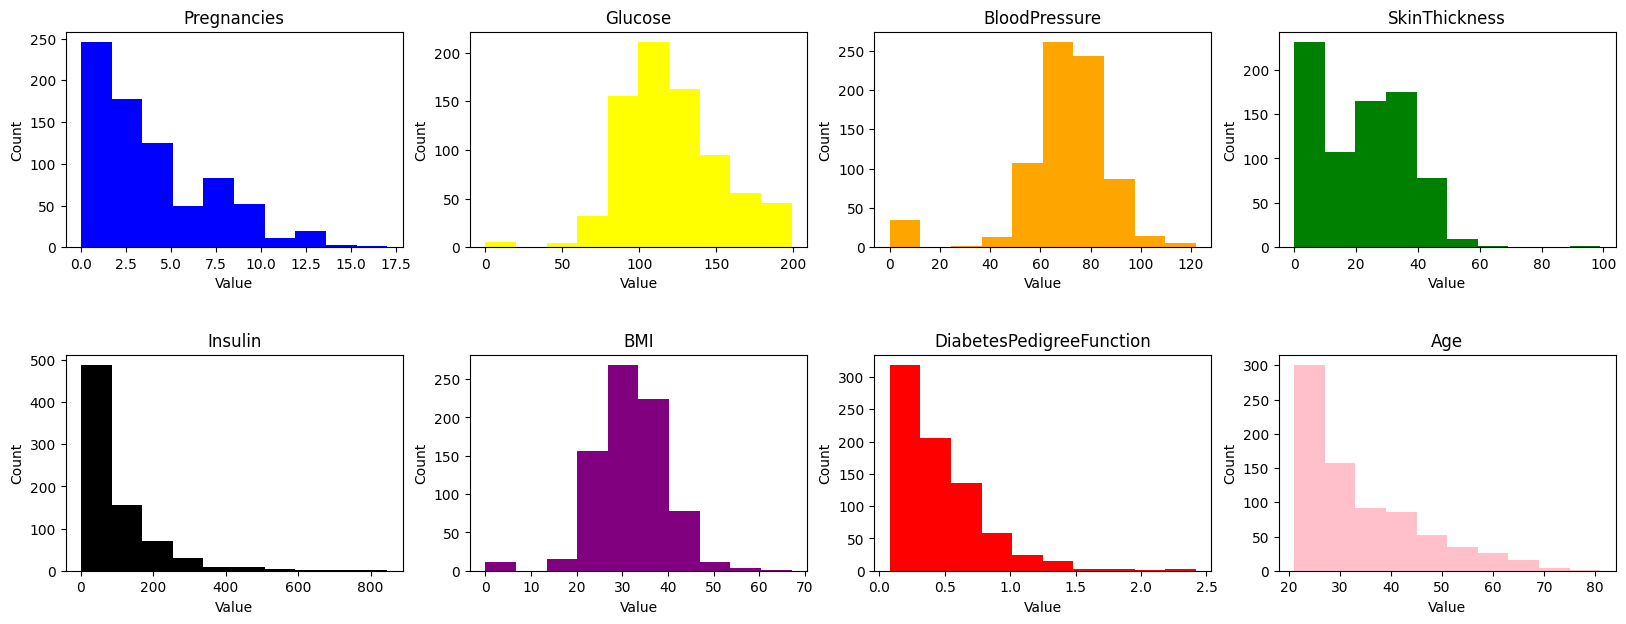

In [69]:
# Data Visualization


fig, axs = plt.subplots(2, 4, figsize=(20, 7))

# Features

# First row
diabetes['Pregnancies'].plot(ax = axs[0, 0], color = 'blue', kind = 'hist', bins = 10, title = 'Pregnancies')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xlabel('Value')

diabetes['Glucose'].plot(ax = axs[0, 1], color = 'yellow', kind = 'hist', bins = 10, title= 'Glucose')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xlabel('Value')

diabetes['BloodPressure'].plot(ax = axs[0, 2], color = 'orange', kind = 'hist', bins = 10, title = 'BloodPressure')
axs[0, 2].set_ylabel('Count')
axs[0, 2].set_xlabel('Value')

diabetes['SkinThickness'].plot(ax = axs[0, 3], color = 'green', kind = 'hist', bins = 10, title = 'SkinThickness')
axs[0, 3].set_ylabel('Count')
axs[0, 3].set_xlabel('Value')

# Second row
diabetes['Insulin'].plot(ax = axs[1, 0], color = 'black', kind = 'hist', bins = 10, title = 'Insulin')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xlabel('Value')

diabetes['BMI'].plot(ax = axs[1, 1], color = 'purple', kind = 'hist', bins = 10, title = 'BMI')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xlabel('Value')

diabetes['DiabetesPedigreeFunction'].plot(ax = axs[1, 2], color = 'red', kind = 'hist', bins = 10, title = 'DiabetesPedigreeFunction')
axs[1, 2].set_ylabel('Count')
axs[1, 2].set_xlabel('Value')

diabetes['Age'].plot(ax = axs[1, 3], color = 'pink', kind = 'hist', bins = 10, title = 'Age')
axs[1, 3].set_ylabel('Count')
axs[1, 3].set_xlabel('Value')

plt.subplots_adjust(hspace=0.5)  # This increases the space between rows

plt.show()

Text(0.5, 0, 'Value')

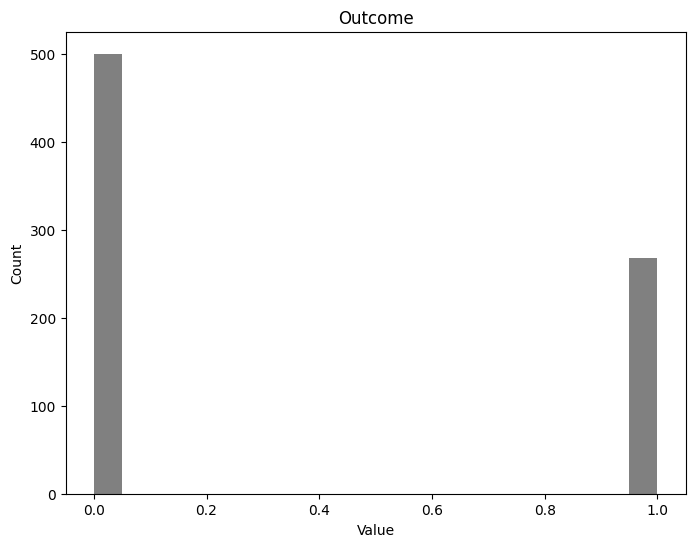

In [87]:
# Target

fig, ax = plt.subplots(figsize=(8, 6))

diabetes['Outcome'].plot(ax=ax, color='gray', kind='hist', bins=20, title='Outcome')
ax.set_ylabel('Count')
ax.set_xlabel('Value')

In [88]:
# Correlation matrix

corr_matrix = diabetes.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
# Preprocessing

# Making matrix from columns
X = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

# Splitting them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# SVM model training
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [5]:
# Predicting and showing accuracy of model

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy for Support Vector Machine is: {accuracy:.2f}")

Accuracy for Support Vector Machine is: 0.81


In [6]:
# Apply GridSearchCV for finding best hyperparameters for SVM

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1],
}

grid_search_cv = GridSearchCV(svm_model, param_grid, cv = 5, n_jobs = -1)
grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_

print("Best parameters:", best_params)

Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}


In [7]:
svm_model_best_params = SVC(C = 10, gamma = 0.001, kernel = 'linear')
svm_model_best_params.fit(X_train, y_train)

y_pred_best_params = svm_model.predict(X_test)
accuracy_best_params = accuracy_score(y_test, y_pred)

print(f"Accuracy for Support Vector Machine with Best Params is: {accuracy:.2f}")

Accuracy for Support Vector Machine with Best Params is: 0.81


In [8]:
# Scale the values

warnings.filterwarnings('ignore', category=UserWarning)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model_best_params_scaled = SVC(C = 10, gamma = 0.001, kernel = 'linear')
svm_model_best_params_scaled.fit(X_train_scaled, y_train)

y_pred_best_params_scaled = svm_model.predict(X_test_scaled)
accuracy_best_params_scaled = accuracy_score(y_test, y_pred)

print(f"Accuracy for Support Vector Machine with Best Params & Scaled Values is: {accuracy:.2f}")

Accuracy for Support Vector Machine with Best Params & Scaled Values is: 0.81


In [9]:
# K-Nearest Neighbours model training and testing

knn_model = KNeighborsClassifier(n_neighbors = 2)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy for K-Nearest Neighbours is: {accuracy:.2f}")

Accuracy for K-Nearest Neighbours is: 0.72


In [10]:
# GridSearchCV with KNN

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50]
}

grid_search_cv_knn = GridSearchCV(knn_model, param_grid, cv = 5)
grid_search_cv_knn.fit(X_train_scaled, y_train)


print("Best parameters:", grid_search_cv_knn.best_params_)


Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}


In [11]:

knn_model_best_params = KNeighborsClassifier(algorithm = 'auto', leaf_size = 10, metric = 'euclidean', n_neighbors = 15, weights = 'distance')

knn_model_best_params.fit(X_train_scaled, y_train)

y_pred_best_params = knn_model_best_params.predict(X_test_scaled)
accuracy_best_params = accuracy_score(y_test, y_pred)

print(f"Accuracy for K-Nearest Neighbours with Best Params is: {accuracy_best_params:.2f}")

Accuracy for K-Nearest Neighbours with Best Params is: 0.72


In [12]:
# Logistic Regression training and testing

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy for Logistic Regression is: {accuracy:.2f}")

Accuracy for Logistic Regression is: 0.80


In [13]:
# Logistic Regression with GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'multi_class': ['ovr', 'multinomial'], 
    'max_iter': [100, 200, 300]  
}

grid_search_cv_log_reg = GridSearchCV(log_reg_model, param_grid, cv = 5, n_jobs = -1)
grid_search_cv_log_reg.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search_cv_log_reg.best_params_)


Best Hyperparameters: {'C': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'newton-cg'}


In [14]:
log_reg_model_best_params = LogisticRegression(C = 1, max_iter = 100, multi_class = 'multinomial', solver = 'newton-cg')
log_reg_model_best_params.fit(X_train_scaled, y_train)

y_pred = log_reg_model_best_params.predict(X_test_scaled)
accuracy_best_params = accuracy_score(y_test, y_pred)

print(f"Accuracy for Logistic Regression is: {accuracy_best_params:.2f}")

Accuracy for Logistic Regression is: 0.80
